In [1]:
import matplotlib.pyplot as plt 
import pandas as pd   
import numpy as np
import scipy
import re

In [2]:
# Replace 'your_file_path.txt' with the actual file path
file_path = 'solutions/summary_test/ga.txt'

# Read the data from the file
with open(file_path, 'r') as file:
    lines = file.readlines()

In [3]:
instances = []
avg_times_step = []
scores = []
changed_actual = []

In [4]:
for line in lines:
    if "data/inst_test/" in line:
        instances.append(re.search(r'\/([^\/]+)\.txt', line).group(1))
    elif "Average time per step" in line:
        avg_times_step.append(float(re.search(r'Average time per step: (.+?)s', line).group(1)))
    elif "Score" in line:
        scores.append(int(re.search(r'Score: (\d+)', line).group(1)))
    elif "Changed actual" in line:
        changed_actual.append(re.search(r'Changed actual: (\w+)', line).group(1) == 'True')

In [5]:
df = pd.DataFrame({
    'name': instances,
    'score': scores,
    'changed': changed_actual,
    'avg_step_time': avg_times_step
})

In [6]:
df.shape

(50, 4)

In [8]:
df['changed_numeric'] = df['changed'].astype(int)

# Define aggregation functions
agg_functions = {
    'score': ['mean', 'min', 'max'],
    'avg_step_time': ['mean', 'min', 'max'],
    'changed_numeric': 'mean'
}

# Group by 'name' and apply the aggregation functions
result_df = df.groupby('name').agg(agg_functions).reset_index()

# Rename columns for clarity
result_df.columns = ['name', 'mean_score', 'min_score', 'max_score', 'mean_avg_step_time', 'min_avg_step_time', 'max_avg_step_time', 'proportion_changed']

In [9]:
result_df

,name,mean_score,min_score,max_score,mean_avg_step_time,min_avg_step_time,max_avg_step_time,proportion_changed
0,heur002_n_100_m_3274,2560.4,2384,2772,0.321337,0.277659,0.369739,0.0
1,heur003_n_120_m_2588,5624.2,5466,5718,0.223482,0.211631,0.237476,0.2
2,heur004_n_140_m_3014,6275.0,6119,6440,0.269591,0.253566,0.280737,0.2
3,heur005_n_160_m_4015,9119.6,9070,9210,0.426197,0.395987,0.447375,0.2
4,heur006_n_180_m_6067,12998.4,12716,13262,0.717072,0.676886,0.743045,0.2
5,heur007_n_200_m_6731,16386.2,16097,16576,1.018145,0.941827,1.075055,0.0
6,heur008_n_250_m_1045,1487.2,1421,1531,2.183581,1.845380,2.438247,0.4
7,heur013_n_250_m_22395,26106.0,22307,32772,9.909639,7.326313,14.796429,0.2
8,heur014_n_300_m_14191,38499.0,37824,38809,7.045710,6.188367,8.144200,0.0
9,heur019_n_300_m_28765,37735.2,23839,43402,10.001855,9.379652,10.658092,0.2


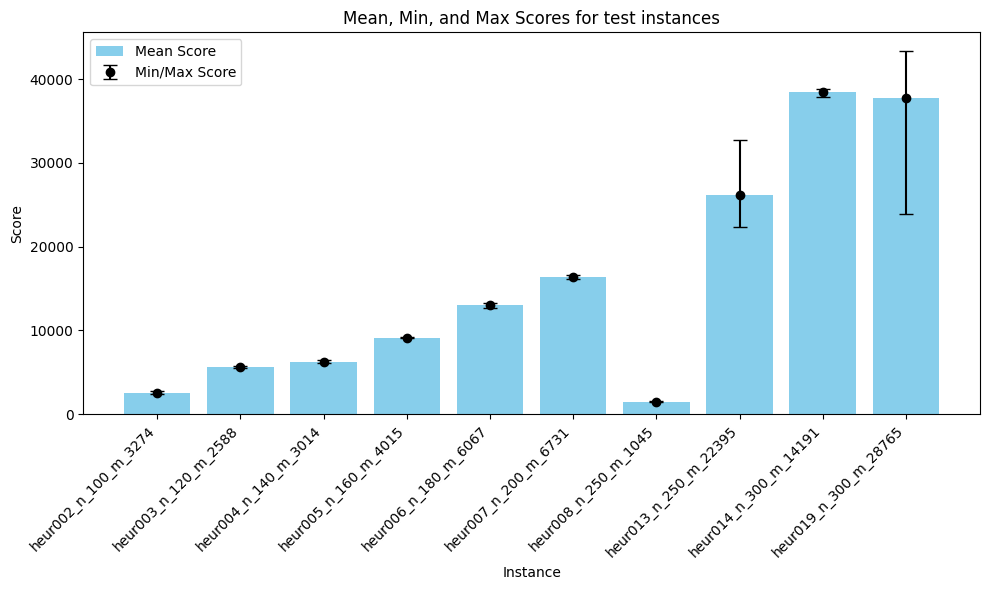

In [10]:
# Set the name column as the index for better x-axis labels
df = result_df.copy()
df.set_index('name', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting mean score as a bar
ax.bar(df.index, df['mean_score'], label='Mean Score', color='skyblue')

# Plotting error bars for min and max scores
ax.errorbar(df.index, df['mean_score'], yerr=[df['mean_score'] - df['min_score'], df['max_score'] - df['mean_score']],
            fmt='o', color='black', capsize=5, label='Min/Max Score')

# Set labels and title
ax.set_xlabel('Instance')
ax.set_ylabel('Score')
ax.set_title('Mean, Min, and Max Scores for test instances')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Statistical Testing.
Perform Wilcoxon-ranked t-test for paired samples.

Reasons:
- too few instances to assess whether noraml or not normal data.

In [26]:
rc_data = pd.read_csv('rc_ga_comparison.csv')
rc_data.head()

,file_path,run_ID,meas_ID,score
0,data/inst_test/heur006_n_180_m_6067.txt,1,1,15581.0
1,data/inst_test/heur006_n_180_m_6067.txt,1,2,13562.0
2,data/inst_test/heur006_n_180_m_6067.txt,1,3,13706.0
3,data/inst_test/heur006_n_180_m_6067.txt,1,4,13613.0
4,data/inst_test/heur006_n_180_m_6067.txt,1,5,14201.0


In [ ]:
result_rc_df = rc_data.groupby(['file_path', 'run_ID'], as_index=False)['score'].agg(min)
result_rc_df.head()

In [ ]:
result_rc_df = result_rc_df.groupby(['file_path'], as_index=False)['score'].agg('mean')

In [67]:
rc_results = list(result_rc_df['score'])
ga_results =list(result_df['mean_score'])

In [78]:
res = scipy.stats.wilcoxon(rc_results, ga_results, alternative = 'two-sided')

# Print results
print(res.pvalue)

0.193359375
